2.0325478717657863 2.0578552578492624 2.332159325693248


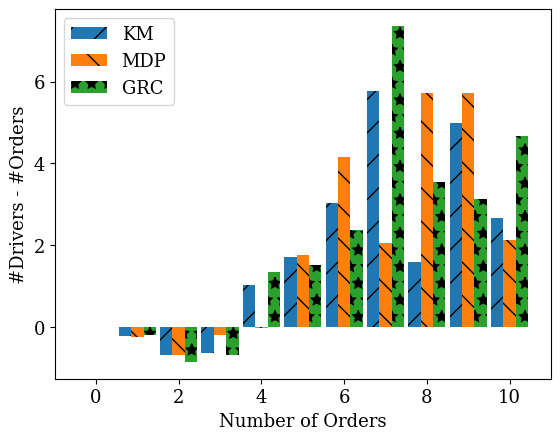

In [77]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import seaborn as sns

BAR_NUM = 10

def get_data(alg, time):
    count_data = {}
    for x in range(BAR_NUM + 1):
        count_data[x] = [0.0]

    for date_idx in [4, 5, 6]:
        order_num_data = pickle.load(open('./result/stats_active_orders'+str(date_idx)+'_2kd_05o_'+alg, 'rb'))
        order_num_step = order_num_data[time]
        driver_num_data = pickle.load(open('./result/stats_active_drivers'+str(date_idx)+'_2kd_05o_'+alg, 'rb'))
        driver_num_step = driver_num_data[time]

        for oid, orders in order_num_step.items():
            clipped_count = len(orders)
            if clipped_count > BAR_NUM:
                clipped_count = BAR_NUM

            if oid in driver_num_step:
                count_data[clipped_count].append(len(driver_num_step[oid]) - clipped_count)
            else:
                count_data[clipped_count].append(0 - clipped_count)

    return count_data

time_step = 6*7 + 6 + 6 + 3
mdp = get_data('mdp', time_step)
mdp_list = [np.mean(v) for v in mdp.values()]
km  = get_data('km', time_step)
km_list = [np.mean(v) for v in km.values()]
grc  = get_data('grc', time_step)
grc_list = [np.mean(v) for v in grc.values()]

fig = plt.figure()
size = 13
plt.rcParams['font.size'] = size
plt.rcParams['font.family'] = 'serif'
plt.rcParams['pdf.fonttype'] = 42

plt.bar(np.arange(BAR_NUM + 1) - 0.3, km_list, label='KM', width=0.3, hatch="/")
plt.bar(np.arange(BAR_NUM + 1) - 0.0, mdp_list, label='MDP', width=0.3, hatch="\\")
plt.bar(np.arange(BAR_NUM + 1) + 0.3, grc_list, label='GRC', width=0.3, hatch="*")
print(np.mean(np.abs(km_list)), np.mean(np.abs(mdp_list)), np.mean(np.abs(grc_list)))

plt.ylabel('#Drivers - #Orders')
plt.xlabel("Number of Orders")
plt.legend()
#plt.show()

fig.savefig("ds_comparison_step_"+str(time_step/6)+".pdf", dpi=fig.dpi, bbox_inches='tight')


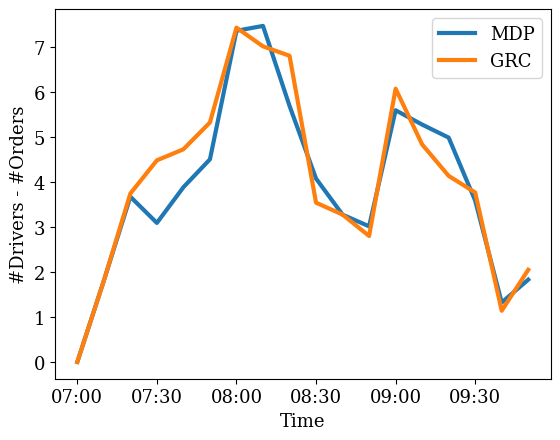

In [71]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import seaborn as sns

BAR_NUM = 10

def get_data(alg, time):
    count_data = {}
    for x in range(BAR_NUM + 1):
        count_data[x] = [0.0]

    for date_idx in [4, 5, 6]:
        order_num_data = pickle.load(open('./result/stats_active_orders'+str(date_idx)+alg, 'rb'))
        order_num_step = order_num_data[time]
        driver_num_data = pickle.load(open('./result/stats_active_drivers'+str(date_idx)+alg, 'rb'))
        driver_num_step = driver_num_data[time]

        for oid, orders in order_num_step.items():
            clipped_count = len(orders)
            if clipped_count > BAR_NUM:
                clipped_count = BAR_NUM

            if oid in driver_num_step:
                count_data[clipped_count].append(len(driver_num_step[oid]) - clipped_count)
            else:
                count_data[clipped_count].append(0 - clipped_count)

    return count_data

mdp_list, km_list, grc_list = [], [], []
for time_step in range(7*6, 10*6):
    mdp = get_data('mdp', time_step)
    mdp_list.append( np.mean(np.abs([np.mean(v) for d, v in mdp.items() if d >= 5])))
    grc  = get_data('grc', time_step)
    grc_list.append(np.mean(np.abs([np.mean(v) for d, v in grc.items() if d >= 5])))

fig = plt.figure()
size = 13
plt.rcParams['font.size'] = size
plt.rcParams['font.family'] = 'serif'
plt.rcParams['pdf.fonttype'] = 42

plt.plot(np.arange(len(mdp_list)), mdp_list, label='MDP', linewidth=3)
plt.plot(np.arange(len(mdp_list)), grc_list, label='GRC', linewidth=3)
plt.xticks(np.arange(0, len(mdp_list), 3), ['07:00', '07:30', '08:00', '08:30', '09:00', '09:30'])

plt.ylabel('#Drivers - #Orders')
plt.xlabel("Time")
plt.legend()
#plt.show()

fig.savefig("ds_comparison_urban.pdf", dpi=fig.dpi, bbox_inches='tight')


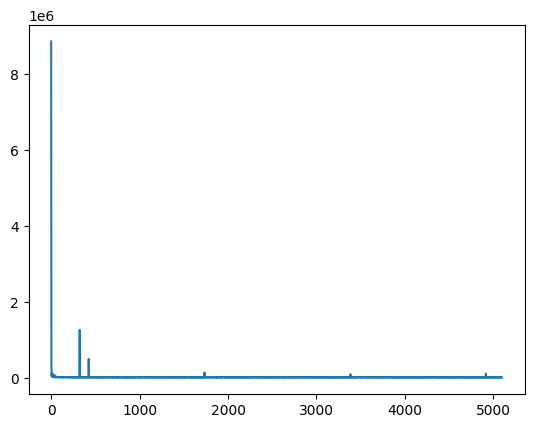

In [17]:
import matplotlib.pyplot as plt
import re
import numpy as np
import sys
import copy

#file = open('nohup_test1.out', 'r')
def read_file(name):
    file = open(name, 'r')
    lines = file.readlines()
    rl_res, km_res, opt_res = [], [], []
    for idx, line in enumerate(lines):
        if line[:3] == 'Los':
            p = re.compile(r'-?\ *[0-9]+\.?[0-9]*(?:[Ee]\ *-?\ *[0-9]+)?')  # Compile a pattern to capture float values
            floats = [float(i) for i in p.findall(line)]  # Convert strings to float
            try:
                rl_res.append(floats[0])
            except:
                print(line)
                break

    return rl_res, km_res, opt_res

loss, reward, gap = read_file('./algorithms/nohup_env.out')
plt.plot(loss)
plt.show()

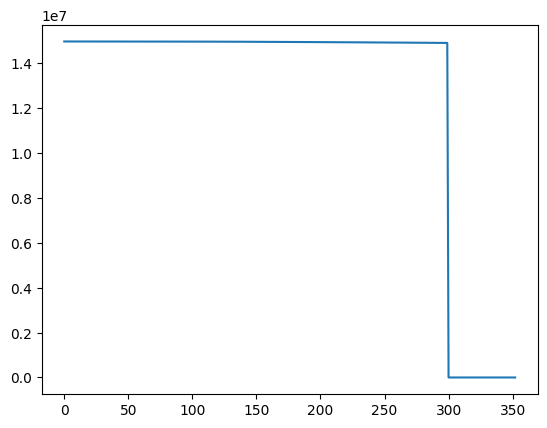

In [29]:
import matplotlib.pyplot as plt
import re
import numpy as np
import sys
import copy

#file = open('nohup_test1.out', 'r')
def read_file(name):
    file = open(name, 'r')
    lines = file.readlines()
    rl_res, km_res, opt_res = [], [], []
    for idx, line in enumerate(lines):
        if line[:3] == 'Los':
            p = re.compile(r'-?\ *[0-9]+\.?[0-9]*(?:[Ee]\ *-?\ *[0-9]+)?')  # Compile a pattern to capture float values
            floats = [float(i) for i in p.findall(line)]  # Convert strings to float
            try:
                rl_res.append(floats[0])
            except:
                print(line)
                break

    return rl_res, km_res, opt_res

loss, reward, gap = read_file('./algorithms/nohup_grc.out')
#loss = [loss[x] for x in range(int(len(loss)/18) * 18)]
#loss = np.array(loss).reshape(-1, 18).mean(1)
plt.plot(loss)
plt.show()